In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv('C:/Users/Admin/Desktop/Uber Analysis/Uber Request Data.csv')

In [3]:
data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57,13-07-2016 22:28
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15,14-07-2016 07:13
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11,15-07-2016 06:07
8,6248,City,1.0,Trip Completed,15-07-2016 17:57,15-07-2016 18:50
9,267,City,2.0,Trip Completed,11-07-2016 06:46,11-07-2016 07:25


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'])
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'])

In [6]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00


In [7]:
print('There are '+str(len(data['Request id'].unique()))+' unique request ids')


There are 6745 unique request ids


In [9]:
#request id is of no use for the analysis, lets remove this column
data.drop('Request id',axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       6745 non-null   object        
 1   Driver id          4095 non-null   float64       
 2   Status             6745 non-null   object        
 3   Request timestamp  6745 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 263.6+ KB


In [12]:
data.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00


In [16]:
#Assumptions:-
#Assumption is driver id is null for all the rides which are 'No Cars Available' status
#Drop time is null for all the records with 'Cancelled' status

In [17]:
data.groupby(['Status']).count()


,Pickup point,Driver id,Request timestamp,Drop timestamp
Status,,,,
Cancelled,1264,1264,1264,0
No Cars Available,2650,0,2650,0
Trip Completed,2831,2831,2831,2831


In [19]:
# so here is not a missing values present in our dataset

In [20]:
#univariate analysis
data.describe()

,Driver id
count,4095.000000
mean,149.501343
std,86.051994
min,1.000000
25%,75.000000
50%,149.000000
75%,224.000000
max,300.000000


In [21]:
# its shwons that we have equal number of rides or requests for all 300 drivers


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Driver id', ylabel='Density'>

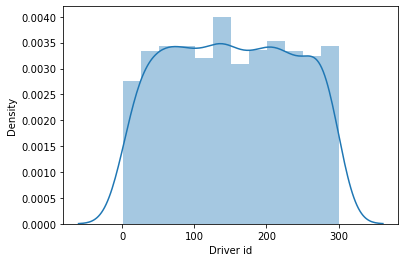

In [22]:
sns.distplot(data[data['Status']!='Trip Completed']['Driver id'])


In [23]:
# this histogram shows that at least not a single driver is cancelling or turning of theri devices intentionally


In [24]:
data.Status.value_counts()*100/data.Status.count()


Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64

In [25]:
# 40 percent trips are completed but more than 50 % rides are not completed also becasue ofno cars availabe or cancelled 

In [26]:
# lets add some more columns 
data['r_date'] = data['Request timestamp'].dt.date
data['r_time'] = data['Request timestamp'].dt.time
data['d_date'] = data['Drop timestamp'].dt.date
data['d_time'] = data['Drop timestamp'].dt.time
data['r_hour'] = data['Request timestamp'].dt.hour.astype(int)
day_of_week = {0:'Mon',1:'Tue',2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'}

In [27]:
# define bins and labels
bins = ['00:00:00', '03:00:00', '11:00:00','15:00:00', '17:00:00', '23:59:59']
labels = ['Late Night', 'Early Morning', 'Mid-Day','Evening', 'Late Evening']

In [28]:
data['dayofweek'] = data['Request timestamp'].dt.dayofweek.map(day_of_week)
data['timeofday'] = pd.cut(pd.to_timedelta(data['Request timestamp'].dt.time.astype(str)), bins=pd.to_timedelta(bins), labels=labels, ordered=False)

In [30]:
#drop the columns which are not required for analysis
data.drop(['Request timestamp','Drop timestamp','d_time','r_time'],axis=1,inplace=True)

In [31]:
data.head()

,Pickup point,Driver id,Status,r_date,d_date,r_hour,dayofweek,timeofday
0,Airport,1.0,Trip Completed,2016-11-07,2016-11-07,11,Mon,Mid-Day
1,Airport,1.0,Trip Completed,2016-11-07,2016-11-07,17,Mon,Late Evening
2,City,1.0,Trip Completed,2016-12-07,2016-12-07,9,Wed,Early Morning
3,Airport,1.0,Trip Completed,2016-12-07,2016-12-07,21,Wed,Late Evening
4,City,1.0,Trip Completed,2016-07-13,2016-07-13,8,Wed,Early Morning


In [32]:
# now lets analysis more about where trips are not completed
data_new = data[data['Status']!='Trip Completed']
len(data_new)

3914

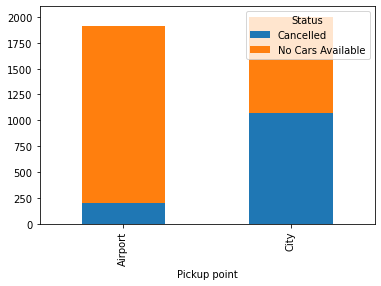

In [36]:
#by pickup points
data_temp = data_new.groupby(['Status','Pickup point']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(data_temp, values ='Pickup point',index=['Pickup point'],columns =['Status']).plot(kind='bar',stacked=True)
plt.show()

In [37]:
display(data_temp)

,Pickup point,r_date
Status,,
Cancelled,Airport,198
Cancelled,City,1066
No Cars Available,Airport,1713
No Cars Available,City,937


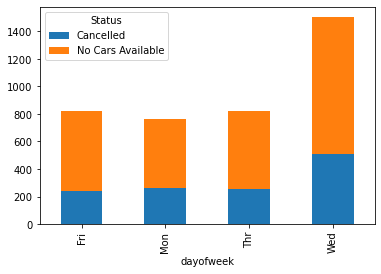

In [38]:
#by dayofweek
data_temp = data_new.groupby(['Status','dayofweek']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(data_temp, values ='dayofweek',index=['dayofweek'],columns =['Status']).plot(kind='bar',stacked=True)
plt.show()

In [39]:
# so the major problem of all these things are on "Wednesday"

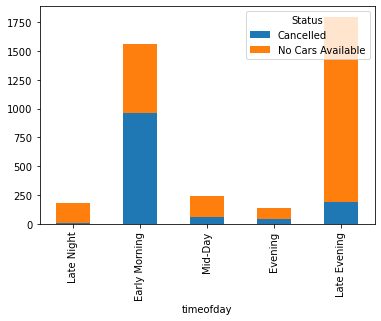

In [41]:
#by timeofday
#Lets analysis ride requests on wednesday for Trips which are not successfully completed and see if we can get some insights

data_temp = data_new.groupby(['Status','timeofday']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(data_temp, values ='timeofday',index=['timeofday'],columns =['Status']).plot(kind='bar',stacked=True)
plt.show()

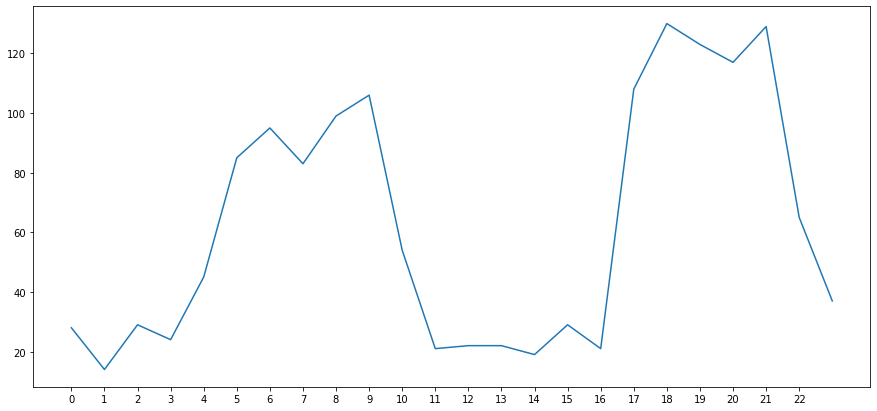

In [42]:
plt.figure(figsize=(15,7)) 
plt.xticks(np.arange(0, 23, 1.0))
keys = list(range(0,24))
data_new[data_new['dayofweek']=='Wed']['r_hour'].value_counts().sort_index().plot()
plt.show()

In [ ]:
# It is evident from the above graph that on wednesday, there is a peak of 'Cabs not available' and 'Cancelled' rides 
#between 3 AM - 11 AM and 4 PM - 12 AM